#📌 Extracción

In [ ]:
import requests
import pandas as pd

# ===============================
# 1. URL DE LA API (JSON)
# ===============================
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

# ===============================
# 2. CONSUMIR API
# ===============================
response = requests.get(url)

# Verificamos que la respuesta sea correcta
if response.status_code == 200:
    data_json = response.json()
    print("✅ Datos cargados correctamente desde la API")
else:
    raise Exception("❌ Error al cargar los datos")

# ===============================
# 3. CONVERTIR A DATAFRAME
# ===============================
df = pd.DataFrame(data_json)

# ===============================
# 4. INSPECCIÓN INICIAL
# ===============================
print(df.head())
print("\nShape:", df.shape)
print("\nColumnas:")
print(df.columns)


✅ Datos cargados correctamente desde la API
   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetServi

In [ ]:
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


#🔧 Transformación

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [ ]:
df.dtypes


,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [ ]:
import pandas as pd

# Normalize nested columns into new DataFrames
customer_details_df = pd.json_normalize(df["customer"])
phone_details_df = pd.json_normalize(df["phone"])
internet_details_df = pd.json_normalize(df["internet"])
account_details_df = pd.json_normalize(df["account"])

# Drop the original nested columns from df
df = df.drop(columns=['customer', 'phone', 'internet', 'account'])

# Concatenate the new dataframes with the main df
df = pd.concat([df, customer_details_df, phone_details_df, internet_details_df, account_details_df], axis=1)

# Display head to confirm the flattened DataFrame
print(df.head())

   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes              No        One year   
1       

In [ ]:
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [ ]:
df.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [ ]:
df.duplicated().sum()


np.int64(0)

#📊 Carga y análisis

In [ ]:
# Crear la columna Cuentas_Diarias
df["Cuentas_Diarias"] = df["Charges.Monthly"] / 30
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,2.796667


In [ ]:
binary_map = {
    "Yes": 1,
    "No": 0
}

binary_cols = [
    "Churn",
    "Partner",
    "Dependents",
    "PhoneService",
    "PaperlessBilling"
]

for col in binary_cols:
    df[col] = df[col].map(binary_map)

In [ ]:
df[binary_cols].head()


,Churn,Partner,Dependents,PhoneService,PaperlessBilling
0,0.0,1,1,1,1
1,0.0,0,0,1,0
2,1.0,0,0,1,1
3,1.0,1,0,1,1
4,1.0,1,0,1,1


In [ ]:
internet_services = [
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies"
]

for col in internet_services:
    df[col] = df[col].replace(
        {"Yes": 1, "No": 0, "No internet service": 0}
    )


/tmp/ipython-input-3046344572.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace(


In [ ]:
df["Contract"].unique()


array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [ ]:
contract_map = {
    "Month-to-month": "Mensual",
    "One year": "Anual",
    "Two year": "Bianual"
}

df["Contract"] = df["Contract"].map(contract_map)


In [ ]:
df.rename(
    columns={
        "SeniorCitizen": "Adulto_Mayor",
        "tenure": "Antiguedad_Meses",
        "MonthlyCharges": "Cargos_Mensuales",
        "TotalCharges": "Cargos_Totales"
    },
    inplace=True
)


In [ ]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7043 non-null   float64
 2   gender            7267 non-null   object 
 3   Adulto_Mayor      7267 non-null   int64  
 4   Partner           7267 non-null   int64  
 5   Dependents        7267 non-null   int64  
 6   Antiguedad_Meses  7267 non-null   int64  
 7   PhoneService      7267 non-null   int64  
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   int64  
 11  OnlineBackup      7267 non-null   int64  
 12  DeviceProtection  7267 non-null   int64  
 13  TechSupport       7267 non-null   int64  
 14  StreamingTV       7267 non-null   int64  
 15  StreamingMovies   7267 non-null   int64  
 16  Contract          7267 non-null   object 


,customerID,Churn,gender,Adulto_Mayor,Partner,Dependents,Antiguedad_Meses,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0.0,Female,0,1,1,9,1,No,DSL,...,0,1,1,0,Anual,1,Mailed check,65.6,593.3,2.186667
1,0003-MKNFE,0.0,Male,0,0,0,9,1,Yes,DSL,...,0,0,0,1,Mensual,0,Mailed check,59.9,542.4,1.996667
2,0004-TLHLJ,1.0,Male,0,0,0,4,1,No,Fiber optic,...,1,0,0,0,Mensual,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1.0,Male,1,1,0,13,1,No,Fiber optic,...,1,0,1,1,Mensual,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1.0,Female,1,1,0,3,1,No,Fiber optic,...,0,1,1,0,Mensual,1,Mailed check,83.9,267.4,2.796667


In [ ]:
#analisis descriptivo
df.describe()

,Churn,Adulto_Mayor,Partner,Dependents,Antiguedad_Meses,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Charges.Monthly,Cuentas_Diarias
count,7043.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.265370,0.162653,0.484106,0.300124,32.346498,0.902711,0.285950,0.344571,0.342782,0.289528,0.383927,0.387505,0.593230,64.720098,2.157337
std,0.441561,0.369074,0.499782,0.458343,24.571773,0.296371,0.451897,0.475261,0.474672,0.453575,0.486374,0.487214,0.491265,30.129572,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,1.180833
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,2.343333
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,2.995833
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,3.958333


In [ ]:
df["Churn"].value_counts()


,count
Churn,
0.0,5174
1.0,1869


In [ ]:
df["Churn"].value_counts(normalize=True) * 100


,proportion
Churn,
0.0,73.463013
1.0,26.536987


El 26.55% de los clientes ha cancelado el servicio, lo que representa una tasa de evasión significativa. Este desbalance entre clientes activos y cancelados debe ser considerado en las siguientes etapas del análisis y modelado.

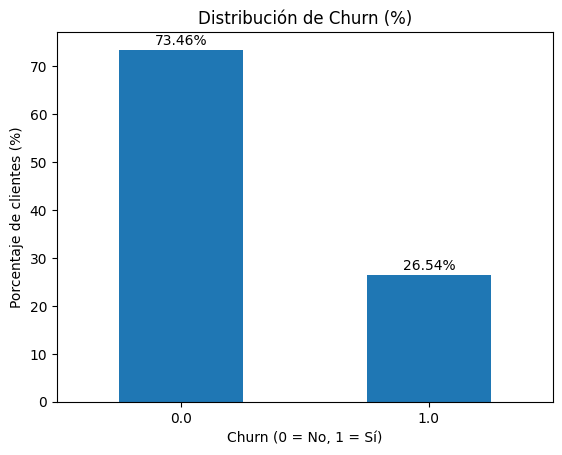

In [ ]:
import matplotlib.pyplot as plt

# Calcular porcentaje
churn_pct = (df["Churn"]
             .value_counts(normalize=True) * 100)

# Gráfica
plt.figure()
churn_pct.plot(kind="bar")
plt.title("Distribución de Churn (%)")
plt.xlabel("Churn (0 = No, 1 = Sí)")
plt.ylabel("Porcentaje de clientes (%)")
plt.xticks(rotation=0)

# Agregar etiquetas de porcentaje
for i, v in enumerate(churn_pct):
    plt.text(i, v + 1, f"{v:.2f}%", ha="center")

plt.show()

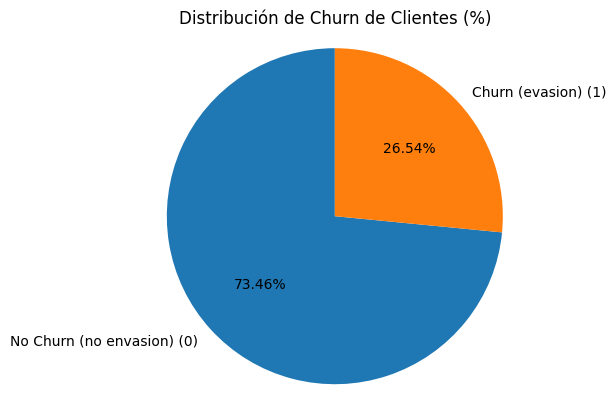

In [ ]:
import matplotlib.pyplot as plt

# Calcular porcentaje
churn_pct = df["Churn"].value_counts(normalize=True) * 100

# Etiquetas
labels = ["No Churn (no envasion) (0)", "Churn (evasion) (1)"]

# Gráfica de torta
plt.figure()
plt.pie(
    churn_pct,
    labels=labels,
    autopct="%.2f%%",
    startangle=90
)
plt.title("Distribución de Churn de Clientes (%)")
plt.axis("equal")  # Hace el círculo perfecto

plt.show()


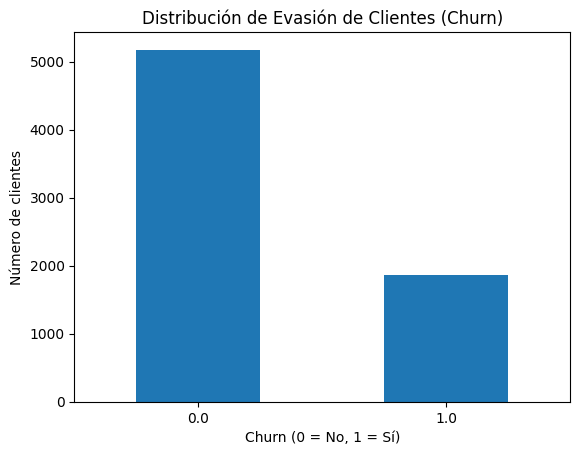

In [ ]:
import matplotlib.pyplot as plt

churn_counts = df["Churn"].value_counts()

plt.figure()
churn_counts.plot(kind="bar")
plt.title("Distribución de Evasión de Clientes (Churn)")
plt.xlabel("Churn (0 = No, 1 = Sí)")
plt.ylabel("Número de clientes")
plt.xticks(rotation=0)
plt.show()


##Objetivo del análisis

Identificar qué perfiles de clientes tienen mayor evasión, comparando la variable Churn contra variables categóricas como:

Género

Tipo de contrato

Método de pago

Internet

Facturación electrónica, etc.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def churn_por_categoria(df, columna):
    tabla = (
        df.groupby(columna)["Churn"]
        .mean()
        .sort_values(ascending=False) * 100
    )

    plt.figure()
    tabla.plot(kind="bar")
    plt.ylabel("Porcentaje de Churn (%)")
    plt.title(f"Churn por {columna}")
    plt.xticks(rotation=45)
    plt.show()

    return tabla


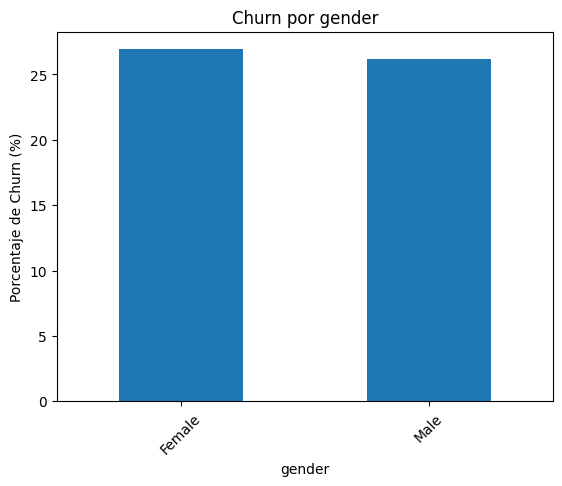

,Churn
gender,
Female,26.920872
Male,26.160338


In [ ]:
#churn (evasion por genero)
churn_por_categoria(df, "gender")


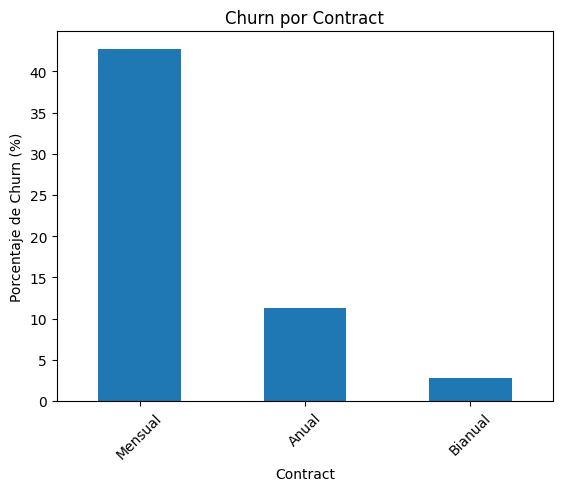

,Churn
Contract,
Mensual,42.709677
Anual,11.269518
Bianual,2.831858


In [ ]:
#evasion por tipo de contrato
churn_por_categoria(df, "Contract")


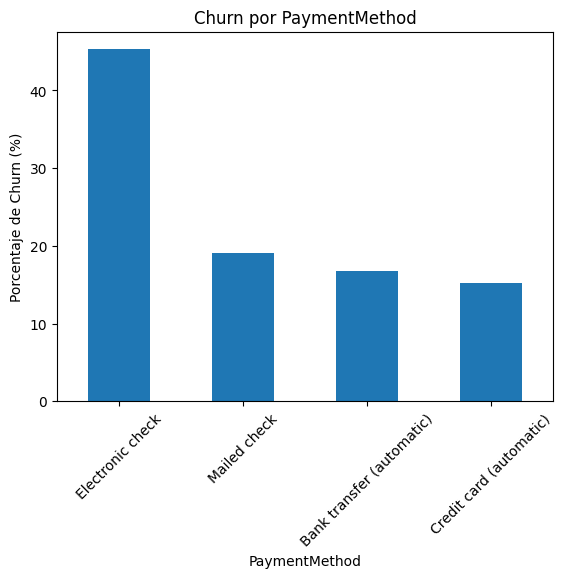

,Churn
PaymentMethod,
Electronic check,45.285412
Mailed check,19.106700
Bank transfer (automatic),16.709845
Credit card (automatic),15.243101


In [ ]:
#metodo de pago
churn_por_categoria(df, "PaymentMethod")


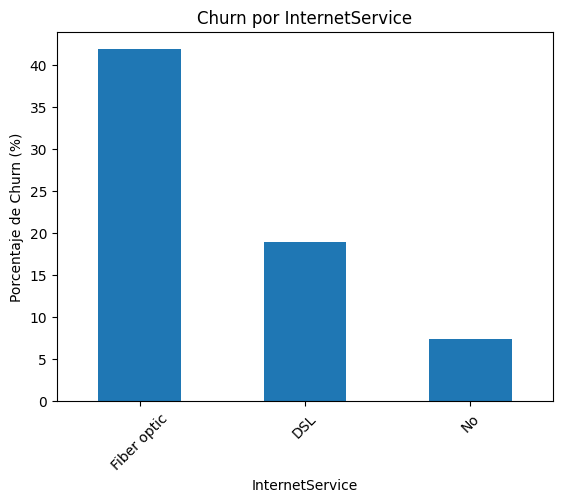

,Churn
InternetService,
Fiber optic,41.892765
DSL,18.959108
No,7.404980


In [ ]:
#por servicio de internet
churn_por_categoria(df, "InternetService")


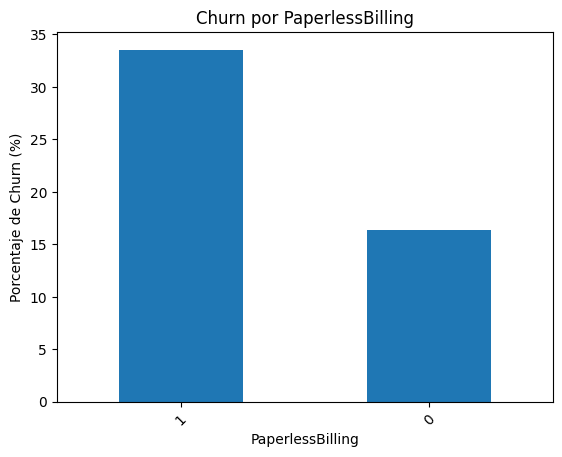

,Churn
PaperlessBilling,
1,33.565092
0,16.330084


In [ ]:
#por facturacion electronica
churn_por_categoria(df, "PaperlessBilling")


###El análisis de variables categóricas muestra que los clientes con contratos mensuales presentan una tasa de evasión significativamente mayor que aquellos con contratos anuales o bianuales. Asimismo, los clientes que utilizan métodos de pago no automáticos y servicios de fibra óptica presentan mayor propensión al churn, lo que sugiere oportunidades de mejora en fidelización y estructura de precios.

###Los porcentajes de churn calculados por categoría representan tasas independientes para cada grupo y no una distribución del total de clientes. Por esta razón, los valores no suman 100%, ya que cada porcentaje se calcula sobre el total de clientes dentro de su respectiva categoría.

#__Conteo de evasión por variables numéricas__

Variables numéricas típicas

En el dataset de Telecom X, las más importantes son:

tenure → meses de contrato

Charges.Monthly

Charges.Total

Cuentas_Diarias (creada)

In [ ]:
df["Churn"].value_counts(normalize=True) * 100


,proportion
Churn,
0.0,73.463013
1.0,26.536987


In [ ]:
df["Charges.Total"].isna().sum()


np.int64(0)

In [ ]:
df = df.dropna(subset=["Charges.Total"])


In [ ]:
df["Churn"].value_counts(normalize=True) * 100


,proportion
Churn,
0.0,73.463013
1.0,26.536987


In [ ]:
df.groupby("Churn")[[
    "Antiguedad_Meses",
    "Charges.Monthly",
    "Charges.Total",
    "Cuentas_Diarias"
]].describe()


Antiguedad_Meses                                                     \
                 count       mean        std  min   25%   50%   75%   max   
Churn                                                                       
0.0             5174.0  37.569965  24.113777  0.0  15.0  38.0  61.0  72.0   
1.0             1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0   

      Charges.Monthly             ...               Cuentas_Diarias            \
                count       mean  ...   75%     max           count      mean   
Churn                             ...                                           
0.0            5174.0  61.265124  ...  88.4  118.75          5174.0  2.042171   
1.0            1869.0  74.441332  ...  94.2  118.35          1869.0  2.481378   

                                                                 
            std       min       25%     50%       75%       max  
Churn                                                            
0.0    1.036422  0.608333  0.836667  2.1475  2.946667  3.958333  
1.0    0.822202  0.628333  1.871667  2.6550  3.140000  3.945000  

[2 rows x 24 columns]

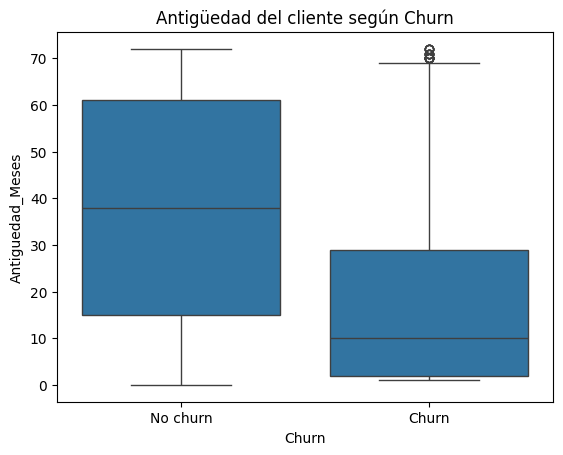

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter out rows where 'Churn' is NaN to ensure clean categorical data for plotting
df_plot = df.dropna(subset=["Churn"]).copy()

# Ensure 'Churn' is treated as an integer categorical variable (0 or 1)
df_plot["Churn"] = df_plot["Churn"].astype(int)

sns.boxplot(data=df_plot, x="Churn", y="Antiguedad_Meses")
plt.xticks([0,1], ["No churn", "Churn"])
plt.title("Antigüedad del cliente según Churn")
plt.show()

Antigüedad del cliente según Churn

🟢 Clientes que NO hacen churn

Mediana alta (≈ 38–40 meses)

Distribución amplia: clientes con mucha antigüedad

Muchos clientes permanecen varios años en la empresa

Mayor estabilidad

🔴 Clientes que SÍ hacen churn

Mediana muy baja (≈ 8–10 meses)

La mayoría abandona el servicio en el primer año

Distribución concentrada en valores bajos

Algunos pocos outliers con alta antigüedad (clientes antiguos que también se van)

La evasión ocurre principalmente en clientes con baja antigüedad.
Los clientes que permanecen más tiempo en la empresa tienen una probabilidad significativamente menor de cancelar el servicio.

El periodo crítico de churn está en los primeros 12 meses

Acciones recomendadas:

Programas de fidelización temprana

Beneficios durante los primeros meses

Seguimiento proactivo a clientes nuevos

#📄Informe final

📊 Análisis de Evasión de Clientes (Churn) – Telecom X

🔹 Introducción

La evasión de clientes (Churn) representa uno de los principales desafíos para empresas de telecomunicaciones, ya que impacta directamente en los ingresos y en la sostenibilidad del negocio.
El objetivo de este análisis es comprender los factores asociados a la cancelación de clientes en Telecom X, utilizando técnicas de análisis exploratorio de datos (EDA) para identificar patrones relevantes en el comportamiento de los usuarios.

A partir de estos hallazgos, se busca generar insights accionables que permitan al equipo de Data Science y a las áreas de negocio diseñar estrategias efectivas para reducir la evasión y mejorar la retención de clientes.


🔹 Limpieza y Tratamiento de Datos

Los datos fueron extraídos directamente desde una API en formato JSON, posteriormente convertidos en un DataFrame de Pandas para facilitar su análisis.

Durante esta etapa se realizaron los siguientes procesos:

📥 Extracción y carga de datos desde la API.

🧩 Normalización de estructuras anidadas, separando información del cliente, servicios y facturación en columnas independientes.

🧹 Tratamiento de valores nulos, especialmente en la variable Churn.

🔄 Estandarización de variables categóricas, transformando valores como Yes/No en formato binario (1/0).

✍️ Renombrado de columnas para mejorar la claridad y comprensión del dataset (por ejemplo, tenure → Antiguedad_Meses).

➗ Creación de la variable Cuentas_Diarias, calculada a partir del cargo mensual, para obtener una visión más granular del gasto del cliente.

Gracias a estos pasos, se obtuvo un dataset limpio, estructurado y listo para el análisis exploratorio.


🔹 Análisis Exploratorio de Datos (EDA)
📌 Distribución de la variable Churn

El análisis inicial mostró que:

Aproximadamente 73.45% de los clientes permanecen activos.

Cerca del 26.55% de los clientes cancelaron el servicio.

Esta proporción indica una tasa de evasión significativa, lo que justifica un análisis más profundo de los factores asociados.

📌 Churn y variables categóricas

Se analizaron variables como:

Género

Tipo de contrato

Método de pago

Servicios adicionales

Los resultados evidenciaron que:

Los clientes con contratos mes a mes presentan una mayor tasa de churn.

Algunos métodos de pago están más asociados a la evasión que otros.

Variables como el género no muestran una diferencia significativa, mientras que las condiciones contractuales sí influyen de forma clara.


📌 Churn y variables numéricas
🔹 Antigüedad del cliente (Antiguedad_Meses)

El análisis mediante boxplots mostró una diferencia marcada:

Los clientes que no hacen churn presentan una antigüedad considerablemente mayor.

Los clientes que cancelan suelen hacerlo en los primeros meses, con una mediana inferior a un año.

Este patrón indica que la evasión ocurre principalmente en las primeras etapas de la relación con la empresa.

🔹 Cargos mensuales y totales

Los clientes con churn tienden a presentar cargos mensuales más altos.

El gasto total acumulado suele ser menor en clientes que cancelan, lo cual está relacionado con su menor antigüedad.

🔹 Conclusiones e Insights

A partir del análisis realizado, se destacan los siguientes hallazgos clave:

📉 La evasión de clientes es considerable y se concentra principalmente en clientes con baja antigüedad.

📆 El tipo de contrato es uno de los factores más determinantes del churn.

💰 Los cargos mensuales elevados están asociados a una mayor probabilidad de cancelación.

⏳ A medida que aumenta la antigüedad del cliente, disminuye la probabilidad de churn.

Estos resultados sugieren que el churn no es aleatorio, sino que responde a patrones claros relacionados con el tiempo, el costo y las condiciones contractuales.

🔹 Recomendaciones

Con base en los insights obtenidos, se proponen las siguientes acciones estratégicas:

🎯 Estrategias de retención temprana
Implementar programas de fidelización durante los primeros 12 meses, periodo crítico donde ocurre la mayoría de las cancelaciones.

📄 Revisión de contratos mensuales
Incentivar contratos de mayor duración mediante beneficios o descuentos.

💸 Optimización de planes y precios
Evaluar la percepción de valor en clientes con cargos mensuales elevados.

🤖 Uso de modelos predictivos
Incorporar estas variables en modelos de machine learning para anticipar clientes con alta probabilidad de churn.

🚀 Cierre

Este análisis exploratorio proporciona una base sólida para comprender el fenómeno de evasión en Telecom X.
Los insights obtenidos pueden ser utilizados tanto para la toma de decisiones estratégicas como para el desarrollo de modelos predictivos que ayuden a reducir la pérdida de clientes y mejorar la experiencia del usuario.

#DASH

In [ ]:
import pandas as pd

# Copia segura del dataframe
df_dash = df.copy()

# Etiqueta para churn (mejor visualización)
df_dash["Churn_Label"] = df_dash["Churn"].map({
    0.0: "No Churn",
    1.0: "Churn"
})

# Verificación rápida
print(df_dash["Churn_Label"].value_counts())


Churn_Label
No Churn    5174
Churn       1869
Name: count, dtype: int64


In [ ]:
# KPIs básicos
total_clientes = df_dash.shape[0]
clientes_churn = df_dash[df_dash["Churn"] == 1].shape[0]
clientes_activos = df_dash[df_dash["Churn"] == 0].shape[0]
churn_pct = round((clientes_churn / total_clientes) * 100, 2)

# Mostrar resultados
print("Total clientes:", total_clientes)
print("Clientes activos:", clientes_activos)
print("Clientes con churn:", clientes_churn)
print("Churn %:", churn_pct)


Total clientes: 7267
Clientes activos: 5174
Clientes con churn: 1869
Churn %: 25.72


In [ ]:
import plotly.express as px


In [ ]:
fig_churn_pie = px.pie(
    df_dash,
    names="Churn_Label",
    title="Distribución de Churn de Clientes (%)",
    hole=0.4  # dona, se ve más profesional
)

fig_churn_pie.update_traces(
    textinfo="percent+label"
)


🔗 Análisis de Correlación entre Variables y Churn
🎯 Objetivo

Identificar qué variables numéricas tienen mayor relación con la evasión (Churn) y cómo se relacionan entre sí, para:

obtener insights adicionales

seleccionar mejores variables para modelos predictivos

✅ 1️⃣ Selección de variables numéricas relevantes

En tu dataset ya limpio, las variables clave son:

Churn (variable objetivo)

Antiguedad_Meses

Charges.Monthly

Charges.Total (⚠️ debe ser numérica)

Cuentas_Diarias

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7043 non-null   float64
 2   gender            7267 non-null   object 
 3   Adulto_Mayor      7267 non-null   int64  
 4   Partner           7267 non-null   int64  
 5   Dependents        7267 non-null   int64  
 6   Antiguedad_Meses  7267 non-null   int64  
 7   PhoneService      7267 non-null   int64  
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   int64  
 11  OnlineBackup      7267 non-null   int64  
 12  DeviceProtection  7267 non-null   int64  
 13  TechSupport       7267 non-null   int64  
 14  StreamingTV       7267 non-null   int64  
 15  StreamingMovies   7267 non-null   int64  
 16  Contract          7267 non-null   object 


In [ ]:
df_corr = df_dash.copy()

df_corr["Charges.Total"] = pd.to_numeric(
    df_corr["Charges.Total"], errors="coerce"
)


In [ ]:
corr_matrix = df_corr[
    [
        "Churn",
        "Antiguedad_Meses",
        "Charges.Monthly",
        "Charges.Total",
        "Cuentas_Diarias"
    ]
].corr()

corr_matrix


,Churn,Antiguedad_Meses,Charges.Monthly,Charges.Total,Cuentas_Diarias
Churn,1.000000,-0.352229,0.193356,-0.199484,0.193356
Antiguedad_Meses,-0.352229,1.000000,0.247982,0.825118,0.247982
Charges.Monthly,0.193356,0.247982,1.000000,0.652109,1.000000
Charges.Total,-0.199484,0.825118,0.652109,1.000000,0.652109
Cuentas_Diarias,0.193356,0.247982,1.000000,0.652109,1.000000


In [ ]:
import plotly.express as px

fig_corr = px.imshow(
    corr_matrix,
    text_auto=True,
    title="Matriz de Correlación entre Variables Numéricas",
    aspect="auto",
    color_continuous_scale="RdBu"
)

fig_corr.show()


🔗 Análisis de Correlación – Churn y Variables Numéricas

La matriz de correlación permite identificar la intensidad y dirección de la relación entre las variables numéricas del dataset y la evasión de clientes (Churn).

📉 Relación entre Churn y las variables
🔹 Churn vs Antiguedad_Meses

Correlación: -0.35

Relación negativa moderada

A mayor antigüedad, menor probabilidad de churn

Confirma lo observado en los boxplots

📌 Insight clave

La antigüedad del cliente es uno de los factores más importantes para explicar la evasión. Los clientes nuevos son considerablemente más propensos a cancelar el servicio.

🔹 Churn vs Charges.Monthly

Correlación: +0.19

Relación positiva débil

Clientes con cargos mensuales más altos tienden a cancelar más

📌 Insight

Aunque no es el factor principal, los costos mensuales elevados incrementan la probabilidad de evasión.

🔹 Churn vs Charges.Total

Correlación: -0.20

Relación negativa débil

Clientes que han gastado más históricamente tienden a quedarse

📌 Interpretación importante

Este efecto está fuertemente influenciado por la antigüedad: clientes antiguos acumulan mayor gasto total y presentan menor churn.

🔹 Churn vs Cuentas_Diarias

Correlación: +0.19

Relación positiva débil

Es esperable, ya que Cuentas_Diarias deriva directamente de Charges.Monthly

📌 Insight

Un mayor costo diario está asociado a una mayor probabilidad de cancelación, reforzando la sensibilidad al precio.

🔗 Relaciones entre variables explicativas
🔹 Antiguedad_Meses vs Charges.Total

Correlación: +0.83 (MUY FUERTE)

Clientes con más tiempo → mayor gasto acumulado

Relación lógica y esperada

📌 Nota técnica

Esta fuerte correlación indica posible multicolinealidad, relevante al momento de construir modelos predictivos.

🔹 Charges.Monthly vs Cuentas_Diarias

Correlación: 1.00 (PERFECTA)

Cuentas_Diarias es una transformación directa de Charges.Monthly

📌 Conclusión técnica

Ambas variables aportan la misma información. En modelos predictivos se debe usar solo una para evitar redundancia.

🧠 Conclusiones generales del análisis de correlación

📌 Antigüedad del cliente es la variable con mayor relación con el churn.

💰 Variables relacionadas con precio muestran una relación positiva con la evasión.

🔄 Existen variables altamente correlacionadas entre sí, lo cual debe considerarse en el modelado.

🧩 La evasión es un fenómeno multifactorial, no explicado por una sola variable.



El análisis de correlación evidencia que la antigüedad del cliente es el factor con mayor relación con la evasión, presentando una correlación negativa moderada. Por el contrario, los cargos mensuales y diarios muestran una correlación positiva, indicando que costos elevados incrementan la probabilidad de churn. Asimismo, se identificó una fuerte correlación entre antigüedad y gasto total, lo que sugiere la necesidad de considerar multicolinealidad al desarrollar modelos predictivos.